# Activity #1: Stats and Programming Review

Here's the [assignment on Canvas](https://umich.instructure.com/courses/793758/assignments/2823892).

Here's the [data file](https://umich.instructure.com/courses/793758/files/folder/Assignments/Activity%201?preview=41830672) that you'll need.

# Answers to the questions under “Planning Tasks and Questions” 


# Code that does the "Programming Tasks"

First, import the modules we'll need for doing the tasks.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats



In [11]:
import os
os.chdir(  '/Users/libbyh/VSCode/si313') # replace with your path
os.getcwd() # confirm your path is set correctly

'/Users/libbyh/VSCode/si313'

## Task 1: Load In: Save mobile_app_dataset.csv to the same folder as your notebook and load it into a data frame.

In [12]:
df = pd.read_csv('data/mobile_app_dataset.csv')

In [13]:
df.head()

,user_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,sessions,total_time_min,user_group,satisfaction_rating
0,user_00001,0,1,0,0,1,1,0,0,1,...,0,0,1,0,1,0,16,59.51,casual,NaN
1,user_00002,1,1,1,1,1,1,1,0,0,...,0,1,0,0,0,0,5,214.75,professional,NaN
2,user_00003,0,1,1,1,1,0,1,1,1,...,1,0,1,0,0,1,1,129.02,casual,NaN
3,user_00004,0,0,1,1,0,1,1,1,1,...,1,1,1,0,1,1,19,264.96,casual,NaN
4,user_00005,0,0,1,1,0,0,1,0,0,...,0,0,0,1,1,0,15,42.99,professional,NaN


## Data Preparation: Create a new data frame that only includes the 2,000 users who have a satisfaction_rating. All users with a NaN value in this column should be filtered out.

In [14]:
frequencies = df['satisfaction_rating'].value_counts(dropna=False)
print(frequencies)

satisfaction_rating
NaN    48000
4.0      427
1.0      419
5.0      402
3.0      395
2.0      357
Name: count, dtype: int64


In [15]:
df.dropna(subset=['satisfaction_rating'], inplace=True)
print(len(df))  # Should print 2000

2000


## Feature Engineering: For each user in your new DataFrame, create a new column called feature_usage_score. This score should be the sum of the 18 binary feature columns (from feature_1 to feature_18).

In [16]:
cols_to_add = [col for col in df.columns if
                           col.startswith('feature_')]
# print(cols_to_add)
df['feature_usage_score'] = df[cols_to_add].sum(axis=1)

## Data visualization: Generate two plots: one of this new variable, and one box plot of feature_usage_score for each satisfaction_rating level.

### Plot `feature_usage_score`

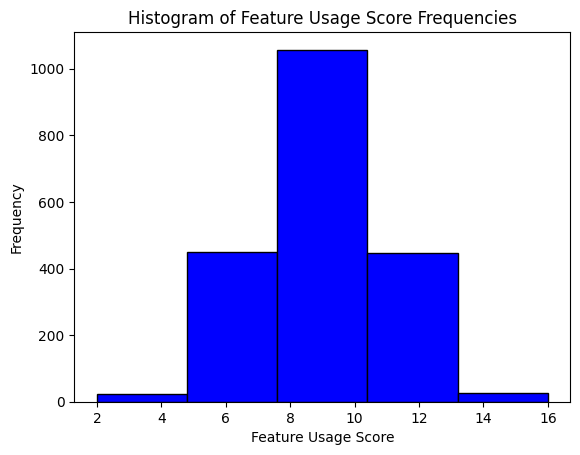

In [19]:
# Create histogram
plt.hist(df['feature_usage_score'], bins=5, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Feature Usage Score')
plt.ylabel('Frequency')
plt.title('Histogram of Feature Usage Score Frequencies')

# Show the plot
plt.show()

### Plot `feature_usage_score` by `satisfaction_rating`

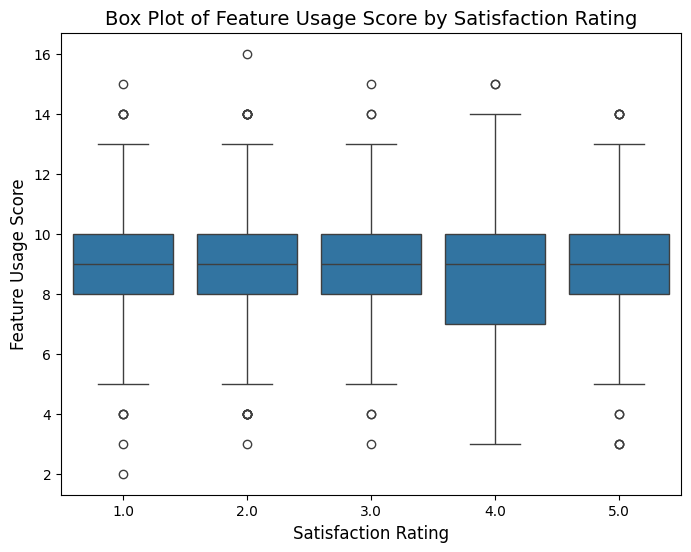

In [22]:
# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='satisfaction_rating', y='feature_usage_score', data=df)

# Add labels and title
plt.title('Box Plot of Feature Usage Score by Satisfaction Rating', fontsize=14)
plt.xlabel('Satisfaction Rating', fontsize=12)
plt.ylabel('Feature Usage Score', fontsize=12)

# Show the plot
plt.show()

# Descriptive Analysis: Using the new feature_usage_score column, calculate and display the following:


## The average feature_usage_score for each of the five satisfaction_rating levels (1-5).

In [30]:
# Group by 'satisfaction_rating' and calculate the average 'feature_usage_score'
average_scores = df.groupby('satisfaction_rating')['feature_usage_score'].mean()

# Display the result
print(average_scores)

satisfaction_rating
1.0    8.961814
2.0    8.977591
3.0    9.032911
4.0    8.922717
5.0    9.059701
Name: feature_usage_score, dtype: float64


## The average feature_usage_score for each of the three user_group categories (casual, professional, and disinterested).

In [31]:
# Group by 'user_group' and calculate the average 'feature_usage_score'
average_scores = df.groupby('user_group')['feature_usage_score'].mean()

# Display the result
print(average_scores)

user_group
casual           8.975050
disinterested    8.955000
professional     9.038462
Name: feature_usage_score, dtype: float64


# My interpretation of the plots and descriptive analysis

The `feature_usage_score` is basically normally distributed around 9 which means that on average, users used 9 features during the observation period. The plots of `feature_usage_score` by `satisfaction_rating` show that this pattern holds across all levels of satisfaction. Really satisfied users didn't use any more or fewer features than dissatisfied users. The same is true about casual, disinterested, and professional users. They all used about the same number of features. I guess I could run inferential tests or linear models to see if those small differences are statistically significant, but, even if they are, they are likely not meaningful for our app because they won't differ by even 1 feature.